<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<h1 style="font-size: 28px !important; font-weight: 700">پیاده‌سازی سیستم تصمیم‌گیری غیرمتمرکز مبتنی بر بلاکچین</h1>

<table style='border: none; text-align: right !important; float:right; display:block' dir='rtl'>
<tr style='border: none; text-align: right !important;'>
<td style='border: none; font-size: 20px !important; text-align: right !important; font-weight: 700'>امیرحسین بانوی</td>
<td style='border: none; font-size: 15px !important; text-align: right !important; font-weight: 600'>دانشجوی کارشناسی ارشد،نرم‌افزار،کامپیوتر،دانشکده مهندسی،دانشگاه آزاد اسلامی،مشهد،ایران</td>
</tr>
</table>
</div>

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<h2 style="font-size: 24px !important; font-weight: 700">چکیده</h2>
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
دنیای امروز همواره دارد به سمت یک محیط به هم پیوسته مهاجرت می‌کند و در این دنیا، نیاز به سیستم‌های توزیع شده بسیار مهم شده است. اکثر سیستم‌های توزیع شده به دلیل اینکه برای تصمیم‌گیری متکی به یک سیستم مرکزی هستند دارای مشکلاتی همچون single point of failure می‌باشند. همچنین کمبود امنیت اطلاعات و شفاف نبودن فرایند تصمیم‌گیری در این سیستم‌های مدیریتی متمرکز باعث شده است رویکرد‌های تصمیم‌گیری توزیع شده و غیرمتمرکز بر روی بلاکچین مورد استفاده قرار گیرند. در این پیاده‌سازی سعی شده است یک قرارداد هوشمند رای‌گیری بر روی بلاکچین اتریوم نوشته شده و در فرایند اولویت دهی تصمیمات از منطق فازی برای پوشش عدم قطعیت‌ها استفاده گردد.
</p>
</div>

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<h2 style="font-size: 24px !important; font-weight: 700">مقدمه</h2>
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
این پیاده سازی به دو بخش کلی تقسیم می‌گردد: <br />
بخش اول: ابتدا باید قرارداد هوشمند رای گیری نوشته شود، برای نوشتن قرار داد هوشمند از زبان <a href="https://docs.soliditylang.org/en/v0.8.15/">Solidity</a> نسخه‌ی 0.8.15 استفاده شده است. <br />
بخش دوم: در این بخش برای پیاده‌سازی منطق فازی از زبان پایتون استفاده شده است. در اینجا با استفاده از کتاب‌خانه‌ی <a href="https://pythonhosted.org/scikit-fuzzy/">SciKit-Fuzzy</a> یک موتور استنتاج ممدانی نوشته شده و بر اساس آن تصمیمات اولویت بندی می‌گردند. <br />
ورودی‌های این سیستم باید از روی بلاکچین و از طریق قرارداد هوشمند گرفته شود، برای این کار از کتاب‌خانه‌ی <a href="https://web3py.readthedocs.io/en/stable/">Web3.py</a> استفاده شده و اطلاعات به صورت مستقیم از قرارداد هوشمندی که در بخش اول پیاده‌سازی شده است گرفته می‌شود.
</p>
</div>

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<h2 style="font-size: 24px !important; font-weight: 700">پیاده‌سازی</h2>
</div>
<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<h3 style="font-size: 22px !important; font-weight: 600">قرارداد هوشمند</h3>
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
قرارداد هوشمند سیستم رای‌گیری بر اساس بلاک‌های معرفی شده در مقاله‌ی پایه پیاده‌سازی شده است:<br />
<center><a href="https://raw.githubusercontent.com/ahbanavi/blockchain-fuzzy-voting/main/src/storage/1.png"><img style="object-fit: cover; height: 400px;" src='https://raw.githubusercontent.com/ahbanavi/blockchain-fuzzy-voting/main/src/storage/1.png' /></a></center><br />
</p>
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
قرارداد هوشمند به زبان سالیدیتی نوشته شده و در فایل <a href="https://github.com/ahbanavi/blockchain-fuzzy-voting/blob/main/src/Voting.sol">Voting.sol</a> ذخیره شده است.<br />
به دلیل اینکه توجه اصلی این پیاده‌سازی بر روی سیستم فازی است، از توضیح جزئیات پیاده‌سازی این قرارداد چشم پوشی شده است، اما به طور کلی این قرارداد شامل ویژگی‌های زیر می‌باشد:
</p>

<span style="font-size: 18px !important; text-align: right !important; font-weight: 400; text-justify: auto" dir='rtl'>
<ul>
<li><p style="font-size: 18px !important; text-align: right !important; font-weight: 400; text-justify: auto">بلاک رای یا <code>VoteBlock</code> - <a href="https://github.com/ahbanavi/blockchain-fuzzy-voting/blob/ef5cacc7195d3e785e2cff083abca73b083cd1a4/src/Voting.sol#L5-L10">ارجا به کد</a></p>
<ul>
<li>شناسه‌ی رای</li>
<li>زمان ایجاد رای</li>
<li>مقدار رای: بین -۱ و ۱</li>
<li>آدرس Agent رای دهنده  </li>
</ul>
</li>
<br />
<li><p style="font-size: 18px !important; text-align: right !important; font-weight: 400; text-justify: auto">بلاک بازخورد یا <code>FeedbackBlock</code> - <a href="https://github.com/ahbanavi/blockchain-fuzzy-voting/blob/ef5cacc7195d3e785e2cff083abca73b083cd1a4/src/Voting.sol#L12-L17">ارجا به کد</a></p>
<ul>
<li>شناسه‌ی بازخورد</li>
<li>زمان ایجاد بازخورد</li>
<li>متن بازخورد</li>
<li>آدرس Agent بازخورد دهنده</li>
</ul>
</li>
<br />
<li><p style="font-size: 18px !important; text-align: right !important; font-weight: 400; text-justify: auto">بلاک تصمیم یا <code>Decision</code> - <a href="https://github.com/ahbanavi/blockchain-fuzzy-voting/blob/ef5cacc7195d3e785e2cff083abca73b083cd1a4/src/Voting.sol#L19-L25">ارجا به کد</a></p>
<ul>
<li>شناسه‌ی تصمیم</li>
<li>زمان ایجاد تصمیم</li>
<li>آدرس Agent ایجاد کننده‌ی تصمیم</li>
<li>محتوای تصمیم</li>
<li>لیستی از رای‌ها - <code>VoteBlock</code></li>
<li>لیستی از بازخورد‌ها - <code>FeedbackBlock</code></li>
</ul>
</li>
<br />
<li><p style="font-size: 18px !important; text-align: right !important; font-weight: 400; text-justify: auto">بلاک عامل یا <code>Agent</code> - <a href="https://github.com/ahbanavi/blockchain-fuzzy-voting/blob/ef5cacc7195d3e785e2cff083abca73b083cd1a4/src/Voting.sol#L27-L29">ارجا به کد</a></p>
<ul>
<li>نام عامل</li>
<li>آدرس عامل - به صورت مپ - <a href="https://github.com/ahbanavi/blockchain-fuzzy-voting/blob/ef5cacc7195d3e785e2cff083abca73b083cd1a4/src/Voting.sol#L35">ارجا به کد</a></li>
</ul>
</li>
</ul>
</span>

</div>

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<h3 style="font-size: 22px !important; font-weight: 600">سیستم فازی</h3>
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
برای پیاده‌سازی سیستم فازی، از کتاب‌خانه‌ی <a href="https://pythonhosted.org/scikit-fuzzy/">SciKit-Fuzzy</a> استفاده شده است.<br />
مراحل کار به‌صورت زیر است:<br />
ابتدا کتاب‌خانه‌های مورد نیاز در کد import می‌شود:
</p>
</div>

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np


def Diagram(data):
    data.view()

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
سپس باید ورودی‌های سیستم فازی را تعیین کنیم<br />
سیستم‌ما به تعداد عوامل تصمیم‌گیرنده، متغیر زبانی دارد. در این سیستم، هر چه جایگاه عامل بالاتر باشد، رای آن تاثیر بیشتری بر روی خروجی دارد.<br />
مثلا اگر سیستم ۳ عامل داشته باشد، ما سه ورودی و متغیر زبانی زیر را داریم:<br />
<ul>
<li>ورودی اول: رای عامل ۱ - دارای بیشترین تاثیر</li>
<li>ورودی دوم: رای عامل ۲ - تاثیر متوسط</li>
<li>ورودی سوم: رای عامل ۳ - کمترین تاثیر</li>
</ul>
<br />
مقادیر زبانی تمامی ورودی‌ها به صورت زیر است:<br />
<ul>
<li>رای منفی</li>
<li>رای ممتنع</li>
<li>رای مثبت</li>
</ul>
<br />
قطعه کد زیر، به صورت پویا به تعداد عوامل ورودی‌ها با مقادیر زبانی مشخص ایجاد می‌کند:<br />
</p>
</div>

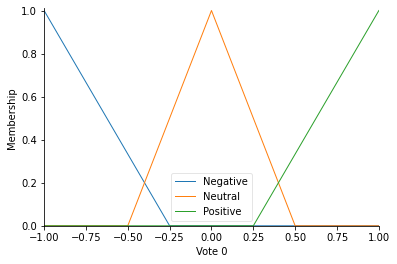

In [2]:
TOTAL_AGENTS = 3

# create fuzzy Votes input variables for the number of agents
votes = {}
for i in range(TOTAL_AGENTS):
    votes[i]  = ctrl.Antecedent(np.arange(-1, 1.25, 0.25), 'Vote ' + str(i))
    votes[i]['Negative'] = fuzz.trimf(votes[i].universe, [-1, -1, -0.25])
    votes[i]['Neutral'] = fuzz.trimf(votes[i].universe, [-0.5, 0, 0.5])
    votes[i]['Positive'] = fuzz.trimf(votes[i].universe, [0.25, 1, 1])
    
Diagram(votes[0])

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
خروجی سیستم:<br />
خروجی سیستم، میزان اولویت تصمیم می‌باشد. این میزان بین -1 و 1 بوده و به صورت زیر تعریف می‌گردد:
<ul>
<li>اولویت پایین</li>
<li>اولویت متوسط</li>
<li>اولویت بالا</li>
</ul>
</p>
</div>

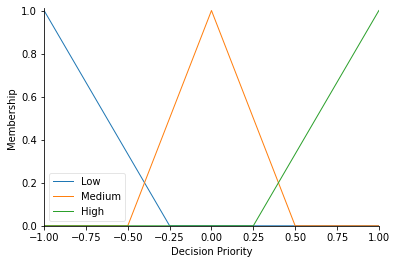

In [3]:
# output for decision priority
decision_priority = ctrl.Consequent(np.arange(-1, 1.25, 0.25), 'Decision Priority')
decision_priority['Low'] = fuzz.trimf(decision_priority.universe, [-1, -1, -0.25])
decision_priority['Medium'] = fuzz.trimf(decision_priority.universe, [-0.5, 0, 0.5])
decision_priority['High'] = fuzz.trimf(decision_priority.universe, [0.25, 1, 1])

Diagram(decision_priority)

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
قوانین سیستم:<br />
این سیستم دارای ۳ ورودی است که هر ورودی ۳ مقدار زبانی دارد، در نتیجه تعداد قوانین سیستم ۲۷ می‌باشد.<br />
قوانین سیستم به صورت زیر است:<br />
</p>
</div>

In [5]:
# create fuzzy rule base for the decision priority
# first votes has higher impact on decision priority

# lower the vote number, the higher the impact
rules = []
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Negative']  & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Negative']  & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Negative']  & votes[2]['Positive'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Neutral']   & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Neutral']   & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Neutral']   & votes[2]['Positive'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Positive']  & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Positive']  & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Negative']  & votes[1]['Positive']  & votes[2]['Positive'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Negative']  & votes[2]['Negative'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Negative']  & votes[2]['Neutral'],     decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Negative']  & votes[2]['Positive'],    decision_priority['Low']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Neutral']   & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Neutral']   & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Neutral']   & votes[2]['Positive'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Positive']  & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Positive']  & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Neutral']   & votes[1]['Positive']  & votes[2]['Positive'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Negative']  & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Negative']  & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Negative']  & votes[2]['Positive'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Neutral']   & votes[2]['Negative'],    decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Neutral']   & votes[2]['Neutral'],     decision_priority['Medium']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Neutral']   & votes[2]['Positive'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Positive']  & votes[2]['Negative'],    decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Positive']  & votes[2]['Neutral'],     decision_priority['High']))
rules.append(ctrl.Rule(votes[0]['Positive']  & votes[1]['Positive']  & votes[2]['Positive'],    decision_priority['High']))


# create fuzzy control system
decision_priority_ctrl = ctrl.ControlSystem(rules)
fuzzy_compute = ctrl.ControlSystemSimulation(decision_priority_ctrl)

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
پیش از آن‌که سراغ دریافت ورودی از بلاکچین برویم، بهتر است سیستم فازی را تست کنیم:<br />
</p>
</div>

Decision Priority: 0.6833333333333333


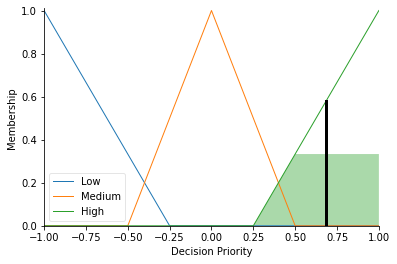

In [7]:
# set input values
fuzzy_compute.input['Vote 0'] = 0.5
fuzzy_compute.input['Vote 1'] = 0.7
fuzzy_compute.input['Vote 2'] = -0.1

# compute output
fuzzy_compute.compute()

# print output
print('Decision Priority: ' + str(fuzzy_compute.output['Decision Priority']))
decision_priority.view(sim=fuzzy_compute)

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<h3 style="font-size: 22px !important; font-weight: 600">وب ۳ - اتصال کانترکت به سیستم فازی</h3>
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
در این مرحله با استفاده از کتاب‌خانه‌ی <a href="https://web3py.readthedocs.io/en/stable/">Web3.py</a> ما کانترکت را بر روی شبکه‌ دیپلوی کرده و با آن ارتباط برقرار می‌کنیم.<br />
</p>
</div>

In [9]:
import web3
import os
from dotenv import load_dotenv

load_dotenv()

True

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
به منظور شبیه‌سازی شبکه‌ی اتریوم، از بلاکچین محلی <a href="https://trufflesuite.com/ganache/">Ganache</a> استفاده می‌کنیم.<br />
</p>
</div>

In [11]:
!ganache-cli

Ganache CLI v6.12.2 (ganache-core: 2.13.2)

Available Accounts
(0) 0x24ea6b8435F103DD873E9a48841a8dA5456f96e3 (100 ETH)
(1) 0x39a206c90a57f9477EF7d3c2cda6599b2D96CC19 (100 ETH)
(2) 0xd7184128E6E2fd8Baa10A6a781bb77FCc7af41dD (100 ETH)
(3) 0x9DF21B3c4bcA71f9c4063A4104Cc7a1c8d12A0A4 (100 ETH)
(4) 0xc1c523971477a5302ecbBf172cbA12ab8332BC56 (100 ETH)
(5) 0x79686BA36E05E7029D446DE1706FA86B9935Af53 (100 ETH)
(6) 0x7Ed2fdCAE69355391B38f214e113FabF18b9B510 (100 ETH)
(7) 0xd76ef98a52BEb57b29CBff26cbD7A806f985CB18 (100 ETH)
(8) 0xBc2a3C97744879AD43f35D99Fe1039c52DeDEc5d (100 ETH)
(9) 0xbe5ee610E578084532658D126d7689F88574A067 (100 ETH)

Private Keys
(0) 0x193cb00808fdf28a4975cb2c608dbaf5ab6241ace72e335d3e1e1cb38081b838
(1) 0xdfa9c2507beeb2f9a4ca1f477c0fb77a5d2c9219bcd3d840ef34a6ef666dade4
(2) 0x62148e3fe4436a02cf386650abc3e3ce699486f077741eb2cf70501575782256
(3) 0x3fe1bc8dc3993869b335044351aae3e397e22217d4899d04a0d008aa0a6e9620
(4) 0xb937cbea5932204ed234992a691d9cf78af4affb58fea5439588aedc8f726a4

<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
همانطور که از خروجی بالا پیداست، بلاکچین Ganache به صورت پیش‌فرض شامل ۱۰ اکانت است که ما جلوتر از سه اکانت اول آن استفاده می‌کنیم.<br />
سپس از طریق زیر کد را به شبکه متصل می‌کنیم:<br />
</p>
</div>

In [13]:
w3 = web3.Web3(web3.HTTPProvider(os.getenv("WEB3_PROVIDER", "http://127.0.0.1:8545")))

# check if connected
print(w3.isConnected())

True


<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
همچنین برای تعامل با کانترکت، ما به سه عامل نیاز داریم که این سه Agent را از طریق زیر از شبکه دریافت می‌کنیم:<br />
</p>
</div>

In [16]:
# load first 3 accounts from provider
accounts = w3.eth.accounts[:3]
print(accounts)

['0x95a661E5749B9333984D77b57B93eF03521FB7ED', '0x57CdaED8DAcB9081D67a1D598eae5269Be5e767B', '0x002f4562E0AbB80e2870317ab111b43677204453']


<div dir='rtl' style="font-family: 'Vazirmatn', sans-serif;">
<p style="font-size: 18px !important; text-align: right; font-weight: 400; text-justify: auto">
به جهت اینکه فرآیند دیپلوی کردن بر روی شبکه از طریق کد طولانی و توضیح آن خارج از بحث اصلی است، کانترکت را در این مرحله با استفاده از <a href="https://remix.ethereum.org/">Remix - Ethereum IDE</a> دیپلوی کرده و آدرس آن را در کد وارد می‌کنیم.<br />
همچنین برای تعامل با کانترکت ما به <a href="https://en.wikipedia.org/wiki/Application_binary_interface">ABI</a> نیز نیاز داریم که از طریق کامپایلر آن را ایجاد و در کد بارگزاری می‌کنیم.<br />
</p>
</div>

In [14]:
!solc Voting.sol --abi -o build --overwrite

Compiler run successful. Artifact(s) can be found in directory "build".


In [17]:
# load abi from abi file
with open("build/Voting.abi", "r") as abi_file:
    abi = abi_file.read()

# get the contract
contract = w3.eth.contract(address="0x4bcE0E5A7f520e0eBeF252FE0E666769efA83Ed8", abi=abi)

# check if contract is connected
print(contract.accounts('accounts').call())


AttributeError: 'Contract' object has no attribute 'accounts'

In [ ]:
# get first decision
decision = contract.functions.decisions(1).call()
print("Decision:", decision)

In [ ]:
# get votes of first decision
votes_info = contract.functions.getVotes(1).call()

votes_input = []
for i in range(len(votes_info)):
    votes_input.append(votes_info[i][2] / 100)

print("Votes:", votes_input)


In [ ]:
print(votes_input)
compute.input['Vote 0'] = votes_input[0]
compute.input['Vote 1'] = votes_input[1]
compute.input['Vote 2'] = votes_input[2]

compute.compute()
print('Decision Priority: ' + str(compute.output['Decision Priority']))

decision_priority.view(sim=compute)